In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Generate Racetrack

In [2]:
import numpy as np

class RaceTrack:
    def __init__(self):
        self.racetrack = np.full((26, 13), -1)

    def generate_valid_positions(self):
        self.racetrack[6, 6:9] = 0
        self.racetrack[7, 6:12] = 0
        self.racetrack[8, 6:8] = 0
        self.racetrack[8, 9:12] = 0
        self.racetrack[9, 6:8] = 0
        self.racetrack[9, 9] = 0
        self.racetrack[9, 11] = 0
        self.racetrack[10, 6:8] = 0
        self.racetrack[10, 9:12] = 0
        self.racetrack[11, 6:10] = 0
        self.racetrack[11, 11] = 0
        self.racetrack[12, 6:9] = 0
        self.racetrack[13, 6:9] = 0
        self.racetrack[14, 6:9] = 0
        self.racetrack[15, 6:9] = 0
        self.racetrack[16, 6:9] = 0
        self.racetrack[17, 6:10] = 0
        self.racetrack[18, 7:10] = 0
        self.racetrack[19, 7:10] = 0
        self.racetrack[20, 7:10] = 0
        self.racetrack[21, 7:10] = 0
        self.racetrack[22, 7:10] = 0
        self.racetrack[23, 7:10] = 0
        return self.racetrack

    def generate_start_positions(self):
        self.racetrack[24, 7] = 1
        self.racetrack[24, 8] = 1
        self.racetrack[24, 9] = 1
        return self.racetrack

    def generate_finish_position(self):
        self.racetrack[7, 12] = 2
        self.racetrack[8, 12] = 2
        self.racetrack[9, 12] = 2
        self.racetrack[10, 12] = 2
        self.racetrack[11, 12] = 2
        return self.racetrack

    def generate_racetrack(self):
        """
        -1: invalid positions
        0: valid positions
        1: start positions
        2: finish positions
        """
        self.racetrack = self.generate_valid_positions()
        self.racetrack = self.generate_start_positions()
        self.racetrack = self.generate_finish_position()
        return self.racetrack
    
    def visualize_racetrack(self):
        cmap = colors.ListedColormap(["red", "blue" , "green", "yellow"])
        plt.figure(figsize=(6,6))
        plt.pcolor(self.racetrack[::-1], cmap=cmap,edgecolors='k', linewidths=3)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        return None

In [3]:
RaceTrackObj = RaceTrack()
race_track = RaceTrackObj.generate_racetrack()
race_track

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  2],
       [-1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  2],
       [-1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  2],
       [-1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  2],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  2],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1],
       [-1, -1, -1, -1, 

# Visualize Racetrack

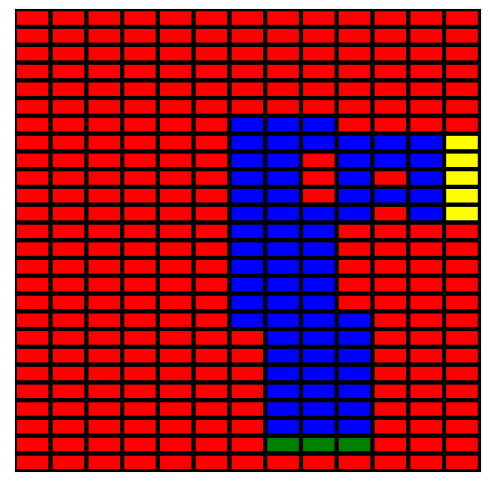

In [4]:
RaceTrackObj.visualize_racetrack()

# Generate Environment

In [5]:
class Env:
    def __init__(self, data):
        self.data = data
        self.step_count = 0

    def reset(self):
        self.step_count = 0
        self.data.episode = {
            "S": [],
            "A": [],
            "probs": [],
            "R": [None]
        }

    def select_random_start_position(self):
        position_x = 24
        random_position_y = np.random.choice([7, 8, 9])
        return (position_x, random_position_y)

    def start(self):
        """Makes the velocity of car zero, and selects any one of the starting
        positions in green.
        """
        state = np.zeros(4)
        state[0], state[1] = self.select_random_start_position()
        return state

    def get_new_state(self, state, action):
        new_state = state.copy()
        new_state[0] = state[0] - state[2]
        new_state[1] = state[1] + state[3]
        new_state[2] = state[2] + action[0]
        new_state[3] = state[3] + action[1]
        return new_state

    def is_finish_line_crossed(self, state, action):
        """
        Returns True if finish line is crosses, False otherwise.
        Finish line is crossed when car reaches any of the a, b, c, d, e grid cells.
        """
        new_state = self.get_new_state(state, action)
        if (new_state[1] == 12) and (new_state[0] in [7, 8, 9, 10, 11]):
            return True
        else:
            return False

    def is_out_of_track(self, state, action):
        """
        Returns True if the car intersects any of the red boundary, False otherwise.
        """
        new_state = self.get_new_state(state, action)
        if race_track[new_state[0], new_state[1]] == -1:
            return True
        else:
            return False

    def step(self, state, action):
        self.data.episode["A"].append(action)
        if self.is_finish_line_crossed(state, action):
            new_state = self.get_new_state(state, action)
            self.data.episode["R"].append(1)
            self.data.episode["S"].append(new_state)
            self.step_count += 1
            return None, new_state

        elif self.is_out_of_track(state, action):
            new_state = self.start()

        else:
            new_state = self.get_new_state(state, action)

        self.data.episode["R"].append(-1)
        self.data.episode["S"].append(new_state)
        self.step_count += 1

        return -1, new_state